# PROJET NLP : IMDB Review Classification 



# Part I: Preprocessing for Sentiment Analysis

#  I - introduction

The Internet Movie Database (IMDb) Review Sentiment Analysis Project is a data science endeavor that focuses on the analysis of movie reviews to determine the sentiment expressed by viewers. IMDb is one of the most popular and comprehensive databases for movies, TV shows, and entertainment-related content, containing a vast collection of user-generated reviews and ratings. This project aims to harness the power of natural language processing (NLP) and machine learning to gain insights into the sentiments of viewers.

### Imports

In [1]:
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import random          
import re

In [2]:
df=pd.read_csv('IMDB Dataset.csv')
df=df.head(10000)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [3]:
len(df),df.index.shape[-1]

(10000, 10000)

In [4]:
## Assess the shape of the data
print("The Shape of the Dataset".format(),df.shape)

The Shape of the Dataset (10000, 2)


# 1- Basic Operations on Text Data and EDA

In [5]:
df.groupby("sentiment").describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative    4972   4960  I watched this movie when Joe Bob Briggs hoste...   
positive    5028   5023  The movie was excellent, save for some of the ...   

                
          freq  
sentiment       
negative     2  
positive     2

In [6]:
#Removing duplicates to avoid overfitting
df.drop_duplicates(inplace=True)

In [7]:
good_reviews=df[df['sentiment']=='positive']['review']
bad_reviews=df[df['sentiment']=='negative']['review']
print("First 10 samples of good reviews\n".format(),good_reviews[:10])
print("First 10 samples of bad reviews\n".format(),bad_reviews[:10])

First 10 samples of good reviews
 0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
4     Petter Mattei's "Love in the Time of Money" is...
5     Probably my all-time favorite movie, a story o...
6     I sure would like to see a resurrection of a u...
9     If you like original gut wrenching laughter yo...
14    This a fantastic movie of three prisoners who ...
16    Some films just simply should not be remade. T...
18    I remember this film,it was the first film i h...
Name: review, dtype: object
First 10 samples of bad reviews
 3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
12    So im not a big fan of Boll's work but then ag...
13    The

Total Counts of both sets positive    5023
negative    4960
Name: sentiment, dtype: int64


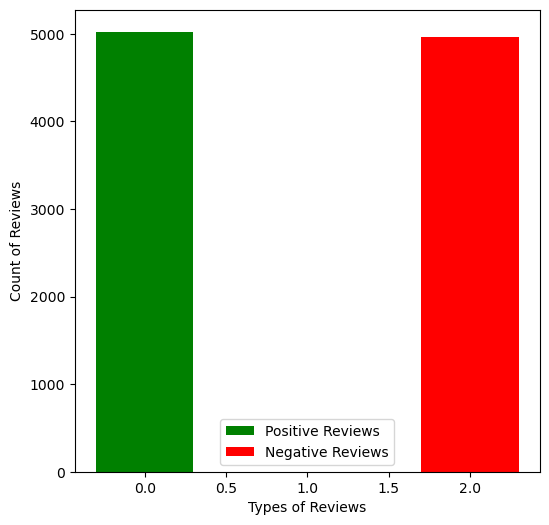

In [8]:
count=df['sentiment'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
    
count_good=df[df['sentiment']=='positive']
count_bad=df[df['sentiment']=='negative']
plot_counts(len(count_good),len(count_bad))

Positive Review Words:0       307
1       162
2       166
4       230
5       119
       ... 
9987    151
9991    202
9993    680
9995    148
9999     97
Name: review, Length: 5023, dtype: int64
Negative Review Words:3       138
7       174
8       130
10       96
11      180
       ... 
9992    113
9994    134
9996    218
9997    228
9998    136
Name: review, Length: 4960, dtype: int64


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


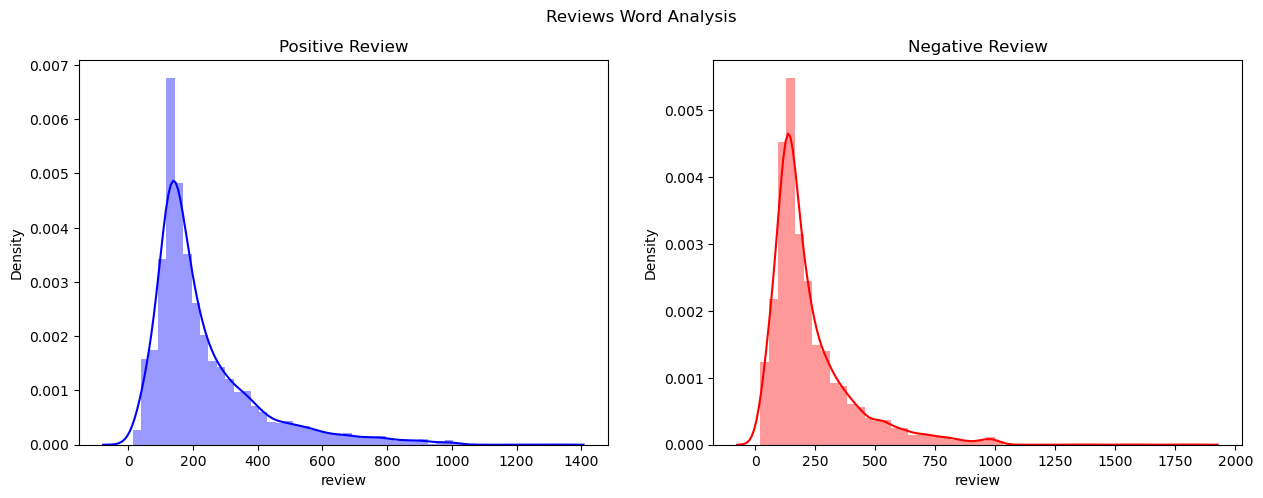

In [9]:
#Analyse the count of words in each segment- both positive and negative reviews
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    




count_good_words=count_good['review'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['review'].str.split().apply(lambda z:cal_len(z))
print("Positive Review Words:" + str(count_good_words))
print("Negative Review Words:" + str(count_bad_words))
plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")

### Word Cloud

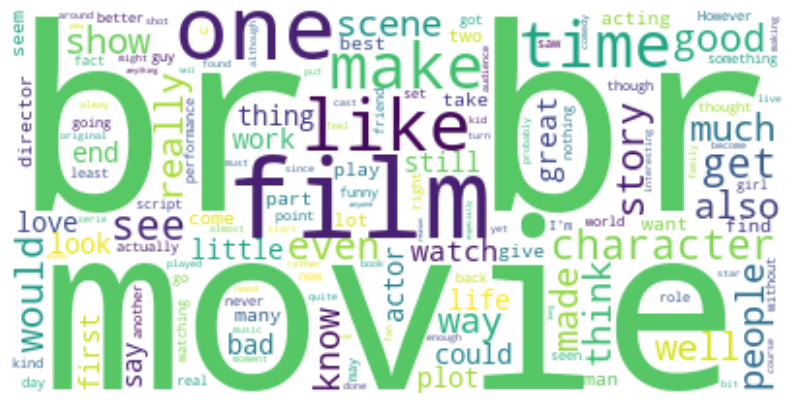

In [10]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Get the list of English stopwords
stops = set(stopwords.words("english"))

def display_cloud(data, color):
    plt.subplots(figsize=(10, 10))
    wc = WordCloud(stopwords=stops, background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42)
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

display_cloud(df['review'], 'red')

<AxesSubplot:>

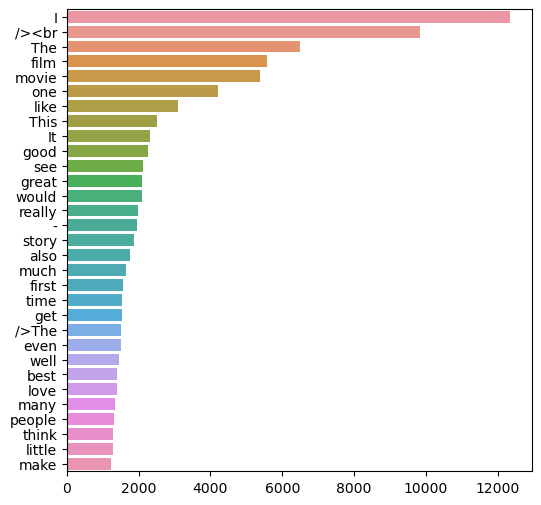

In [11]:
from collections import Counter

def create_corpus(word):
    corpus=[]
    
    for x in df[df['sentiment']==word]['review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('positive')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

#### Inference From Analysis I
The following can be inferred from the data:

The dataset is balanced.

The dataset contains equal number of semantics for reviews of both polarity.

The dataset contains redundant words and html syntaxes.

Punctuations/stopwords are present in a equal distribution in the dataset.

This tells us that we have to do lots of cleaning 

### Visualization of Raw data

In [12]:
positive_reviews = df[df['sentiment'] == 'positive']['review'].tolist()
negative_reviews = df[df['sentiment'] == 'negative']['review'].tolist()


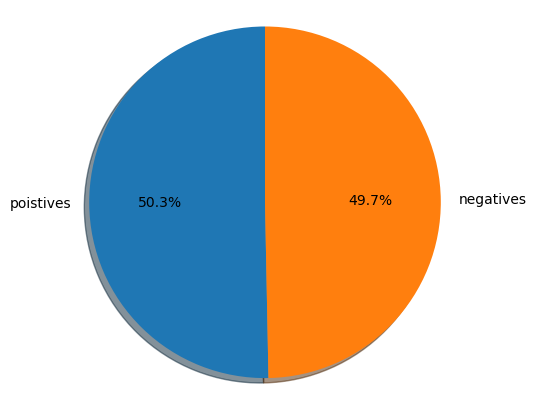

In [13]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'poistives','negatives'

# Sizes for each slide
sizes = [len(positive_reviews),len(negative_reviews)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

### exemple of raw text 

In [14]:
# print positive in greeen('\033[92m')
print('\033[92m' + random.choice(positive_reviews))

# Print a random negative review in red ('\033[91m')
print('\033[91m' + random.choice(negative_reviews))

A gem from Japan, where so many of the world's best films are being made today. Stylistically, this isn't anything all that special. It's just a simple drama (with some comic overtones) about recognizable people going about their lives. Yuko Tanaka, best known for voicing the character Lady Eboshi in Princess Mononoke, plays a 50 year old spinster. She's takes pride in her health, spending each morning in a vigorous workout as she delivers milk up and down the steep hills of Nagasaki. After she is done with this part time job, she works her regular job as a clerk at a grocery store (called S-Mart, which made this Army of Darkness fan giggle). Along her milk route lives a 50 year old man, whose wife is dying. It turns out the milk woman and the man, a child services worker, dated in high school, and each apparently still have something of a crush on the other. The film actually has some major narrative problems. When the screenwriter actually wants the two unrequited lovers to unite, he

### Preprocess raw text for Sentiment analysis of movie reviews

In [15]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [16]:
# if not already done download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We're going to use the important of preprocessing techniques such that:
* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming



### Remove hyperlinks,  hashtags marks and  HTML styles

In [17]:
def clean_text(text):
    # Remove hyperlinks (https:// or http:// followed by non-whitespace characters)
    text = re.sub(r'https?://[^\s]+', '', text)

    # Remove hashtags (remove the '#' symbol from words)
    text = re.sub(r'#', '', text)

    # Remove old style retweet text (e.g., "RT" at the beginning of the text)
    text = re.sub(r'^RT[\s]+', '', text)

    # Remove HTML-style tags (e.g., '<br />')
    text = re.sub(r'<.*?>', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert to lowercase
    text = text.lower()
    return text
df['cleaned_review'] = df['review'].apply(clean_text)

In [18]:
positive_reviews = df[df['sentiment'] == 'positive']['review'].tolist()
negative_reviews = df[df['sentiment'] == 'negative']['review'].tolist()


# Apply the cleaning function to positive and negative reviews
cleaned_positive_reviews = [clean_text(review) for review in positive_reviews]
cleaned_negative_reviews = [clean_text(review) for review in negative_reviews]

# Print a cleaned positive review and a cleaned negative review
print('\033[92m' + cleaned_positive_reviews[0])  # Print a cleaned positive review
print('\033[94m' + cleaned_negative_reviews[0])  # Print a cleaned negative review



one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wou

### Tokenize the string

split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. 

In [19]:
from nltk.tokenize import TweetTokenizer

# Instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# Convert text to lowercase (preserving case=False),  Reduce repeated characters (e.g., "helloooo" becomes "hello") (reduce_len=True)

# Tokenize positive reviews
tokenized_positive_reviews = [tokenizer.tokenize(review) for review in cleaned_positive_reviews]

# Tokenize negative reviews
tokenized_negative_reviews = [tokenizer.tokenize(review) for review in cleaned_negative_reviews]

# Print tokenized positive and negative reviews
print('\033[92m' + 'Tokenized Positive Review:')
print('\033[94m')
print(tokenized_positive_reviews[0])  # Print tokenized positive review

print('\033[92m' + 'Tokenized Negative Review:')
print('\033[94m')
print(tokenized_negative_reviews[0])  # Print tokenized negative review

Tokenized Positive Review:

['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', "you'll", 'be', 'hooked', '.', 'they', 'are', 'right', ',', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', '.', 'trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', ',', 'sex', 'or', 'violence', '.', 'its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', '.', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', ',', 'an', 'expe

### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [20]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)


print('\nPunctuation\n') 
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [21]:
# Initialize lists to store cleaned positive and negative reviews
cleaned_positive_reviews = []
cleaned_negative_reviews = []

# Clean and preprocess tokenized positive reviews
for tokens in tokenized_positive_reviews:
    cleaned_tokens = [word for word in tokens if word not in string.punctuation and word not in stopwords_english]
    cleaned_positive_reviews.append(cleaned_tokens)

# Clean and preprocess tokenized negative reviews
for tokens in tokenized_negative_reviews:
    cleaned_tokens = [word for word in tokens if word not in string.punctuation and word not in stopwords_english]
    cleaned_negative_reviews.append(cleaned_tokens)

# Print cleaned positive and negative reviews
print('\033[92m' + 'Cleaned Positive Review:')
print('\033[94m')
print(cleaned_positive_reviews[0])  # Print cleaned positive review

print('\033[92m' + 'Cleaned Negative Review:')
print('\033[94m')
print(cleaned_negative_reviews[0])  # Print cleaned negative review

Cleaned Positive Review:

['one', 'reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'me.the', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word.it', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', '..', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', '...', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'dare', 'forget', 'pretty', 'pictures', 'pai

# stemming 

Stemming is a text normalization technique that reduces words to their root or base form by removing suffixes. It's faster and simpler than lemmatization but may result in the stem being a non-real word. Lemmatization, on the other hand, transforms words to their canonical or dictionary form, which is linguistically correct but can be computationally expensive.

In [22]:
# Instantiate stemming class
stemmer = PorterStemmer()

# Initialize lists to store stemmed positive and negative reviews
stemmed_positive_reviews = []
stemmed_negative_reviews = []

# Stem the cleaned positive reviews
for cleaned_tokens in cleaned_positive_reviews:
    stemmed_tokens = [stemmer.stem(token) for token in cleaned_tokens]
    stemmed_positive_reviews.append(stemmed_tokens)
for cleaned_tokens in cleaned_negative_reviews:
    stemmed_tokens = [stemmer.stem(token) for token in cleaned_tokens]
    stemmed_negative_reviews.append(stemmed_tokens)

# Print stemmed positive and negative reviews
print('\033[92m' + 'Stemmed Positive Review:')
print('\033[94m')
print(stemmed_positive_reviews[0])  # Print stemmed positive review

print('\033[92m' + 'Stemmed Negative Review:')
print('\033[94m')
print(stemmed_negative_reviews[0])  # Print stemmed negative review

Stemmed Positive Review:

['one', 'review', 'mention', 'watch', '1', 'oz', 'episod', 'hook', 'right', 'exactli', 'happen', 'me.th', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'hardcor', 'classic', 'use', 'word.it', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'focus', 'mainli', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', '..', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', '...', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'charm', 'forget', 'ro

In [23]:
def preprocess_text(text):
    # Instantiate the tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(text)

    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in string.punctuation and word not in stopwords.words('english')]
    
    # Stem the tokens
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

In [24]:
df['cleaned_review'] = df['review'].apply(clean_text)
df['cleaned_review'] = df['cleaned_review'].apply(preprocess_text)


In [25]:
df['cleaned_review']

0       one review mention watch 1 oz episod hook righ...
1       wonder littl product film techniqu unassum old...
2       thought wonder way spend time hot summer weeke...
3       basic there' famili littl boy jake think there...
4       petter mattei' love time money visual stun fil...
                              ...                        
9995    fun entertain movi wwii german spi juli andrew...
9996    give break anyon say good hockey movi know mov...
9997    movi bad movi watch endless seri bad horror mo...
9998    movi probabl made entertain middl school earli...
9999    smash film film-mak show intens strang relatio...
Name: cleaned_review, Length: 9983, dtype: object

## II-Building and Visualizing word frequencies

**Feature extraction** is a crucial step in natural language processing (NLP), where the goal is to convert raw text data into numerical features that can be used for machine learning tasks. Sparse representation is one approach to feature extraction in NLP. 



**Sparse Representations**:

Sparse representations can be created using techniques like one-hot encoding, where each word is represented as a binary vector with a 1 indicating the presence of the word in the document.

build_freqs(): This counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label 1 or a negative label 0. It then builds the freqs dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.

In [26]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

# import our convenience functions
from utils import process_tweet, build_freqs


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
reviews = positive_reviews + negative_reviews

# Let's see how many reviews we have
print("Number of reviews: ", len(reviews))


Number of reviews:  9983


## Word frequency dictionary

In [28]:
positive_labels = ['positive'] * len(stemmed_positive_reviews)
negative_labels = ['negative'] * len(stemmed_negative_reviews)

# Combine positive and negative reviews and labels
all_reviews = stemmed_positive_reviews + stemmed_negative_reviews
all_labels = positive_labels + negative_labels

# Function to build the frequency dictionary
def build_freqs(reviews, labels):
    freqs = {}
    for label, review in zip(labels, reviews):
        for word in review:
            pair = (word, label)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

# Build frequency dictionary
freqs = build_freqs(all_reviews, all_labels)

# Print a basic report
print("Number of reviews: ", len(all_reviews))
print("Number of unique words in the frequency dictionary: ", len(freqs))
print("Example of a word-frequency pair: ", list(freqs.items())[0])
freqs = build_freqs(all_reviews, all_labels)


Number of reviews:  9983
Number of unique words in the frequency dictionary:  77775
Example of a word-frequency pair:  (('one', 'positive'), 5347)


In [29]:
print(freqs)

{('one', 'positive'): 5347, ('review', 'positive'): 358, ('mention', 'positive'): 257, ('watch', 'positive'): 2588, ('1', 'positive'): 196, ('oz', 'positive'): 46, ('episod', 'positive'): 611, ('hook', 'positive'): 78, ('right', 'positive'): 677, ('exactli', 'positive'): 192, ('happen', 'positive'): 590, ('me.th', 'positive'): 6, ('first', 'positive'): 1783, ('thing', 'positive'): 1382, ('struck', 'positive'): 28, ('brutal', 'positive'): 132, ('unflinch', 'positive'): 2, ('scene', 'positive'): 1915, ('violenc', 'positive'): 195, ('set', 'positive'): 835, ('word', 'positive'): 380, ('go', 'positive'): 1654, ('trust', 'positive'): 65, ('show', 'positive'): 2222, ('faint', 'positive'): 9, ('heart', 'positive'): 359, ('timid', 'positive'): 6, ('pull', 'positive'): 200, ('punch', 'positive'): 43, ('regard', 'positive'): 117, ('drug', 'positive'): 176, ('sex', 'positive'): 245, ('hardcor', 'positive'): 25, ('classic', 'positive'): 554, ('use', 'positive'): 984, ('word.it', 'positive'): 1, ('

In [30]:
sorted_freqs = sorted(freqs.items(), key=lambda x: x[1], reverse=True)

# Select the top N words based on frequency
top_words = sorted_freqs[:1000] 
top_words


[(('movi', 'negative'), 11206),
 (('film', 'positive'), 9394),
 (('movi', 'positive'), 8815),
 (('film', 'negative'), 8451),
 (('one', 'positive'), 5347),
 (('one', 'negative'), 5025),
 (('like', 'negative'), 4876),
 (('like', 'positive'), 3914),
 (('get', 'negative'), 3126),
 (('make', 'negative'), 3115),
 (('even', 'negative'), 3113),
 (('time', 'positive'), 3092),
 (('good', 'negative'), 2982),
 (('good', 'positive'), 2908),
 (('see', 'positive'), 2893),
 (('bad', 'negative'), 2867),
 (('time', 'negative'), 2859),
 (('watch', 'negative'), 2858),
 (('would', 'negative'), 2835),
 (('stori', 'positive'), 2729),
 (('charact', 'negative'), 2721),
 (('...', 'negative'), 2671),
 (('charact', 'positive'), 2650),
 (('great', 'positive'), 2594),
 (('watch', 'positive'), 2588),
 (('make', 'positive'), 2586),
 (('see', 'negative'), 2550),
 (('love', 'positive'), 2497),
 (('get', 'positive'), 2494),
 (('realli', 'negative'), 2350),
 (('well', 'positive'), 2341),
 (('look', 'negative'), 2332),
 (

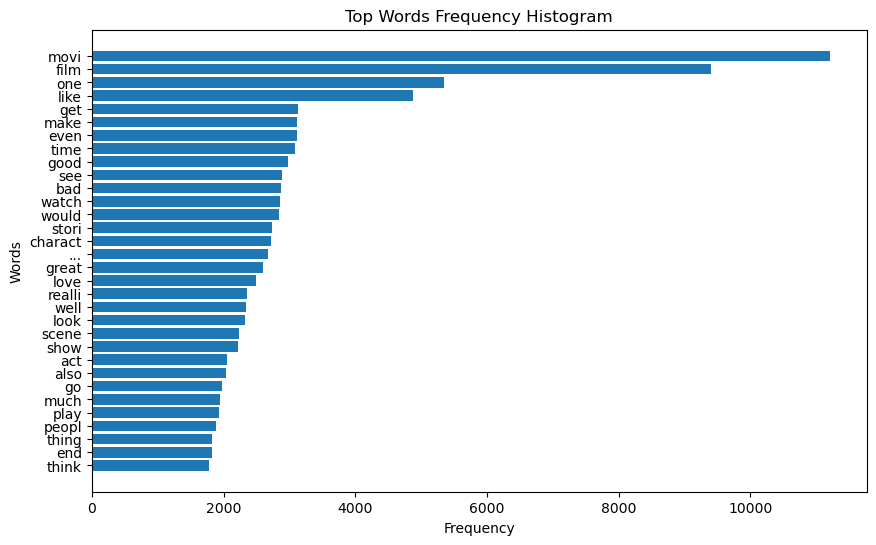

In [31]:
# Separate words and frequencies
words_sentiments, frequencies = zip(*top_words[:50])
words, sentiments = zip(*words_sentiments)

# Create a horizontal bar chart for the top words
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top Words Frequency Histogram')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent words at the top
plt.show()




### Feature extraction

### TFIDF vectors

TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a technique used for text data preprocessing and feature extraction. It is widely used in natural language processing (NLP) and text mining tasks.

<img src="tfidf.png" alt="tfidf">

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the reviews
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])
X_tfidf

<9983x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 730113 stored elements in Compressed Sparse Row format>

In [33]:
%%time
tfidf_vect=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
train_tfidf=tfidf_vect.fit_transform(df['cleaned_review'].values.tolist())
train_tfidf.shape


Wall time: 6.12 s


(9983, 1741038)

In [34]:
## Outputs from the TF-IDF transformed data
print(train_tfidf)


  (0, 1646716)	0.05388981955687548
  (0, 1613590)	0.05388981955687548
  (0, 297936)	0.05388981955687548
  (0, 141928)	0.05388981955687548
  (0, 1103787)	0.05388981955687548
  (0, 1673118)	0.05388981955687548
  (0, 508042)	0.05388981955687548
  (0, 1195310)	0.05388981955687548
  (0, 1403763)	0.05388981955687548
  (0, 1476453)	0.05388981955687548
  (0, 834694)	0.05388981955687548
  (0, 167438)	0.05388981955687548
  (0, 1195224)	0.05388981955687548
  (0, 1603833)	0.05388981955687548
  (0, 769041)	0.05388981955687548
  (0, 275123)	0.05388981955687548
  (0, 978615)	0.05388981955687548
  (0, 945997)	0.05388981955687548
  (0, 117658)	0.05388981955687548
  (0, 1092470)	0.05388981955687548
  (0, 817443)	0.05388981955687548
  (0, 893088)	0.05388981955687548
  (0, 769023)	0.05388981955687548
  (0, 1057525)	0.05388981955687548
  (0, 1416710)	0.05388981955687548
  :	:
  (9982, 928011)	0.04921259825488613
  (9982, 982086)	0.034758935988427546
  (9982, 956261)	0.03903088586527681
  (9982, 18777)	0.03

A coordinate or index pair (e.g., (0, 1646716)): This pair signifies a specific location or position within a data structure, such as a matrix, array, or sparse data representation.

A numerical value (e.g., 0.05388981955687548): This value is associated with the specified position in the data structure. 

## Part II Modeling

#### decomposition of the train and test sets


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['sentiment'], test_size=0.2, random_state=42)



### Lgistic regression

In [36]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


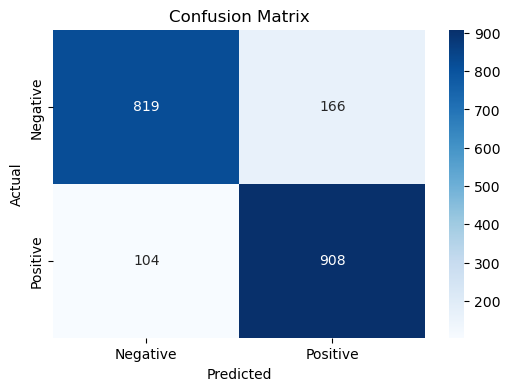

In [37]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### SVM (Support Vector Machine )

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model Accuracy: {accuracy:.2f}')


SVM Model Accuracy: 0.87


#### Gridsearch to otimize svm parameters

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # SVM kernel types
}

# Create the SVM model
svm_model = SVC()

# Initialize GridSearchCV with the SVM model and parameter grid
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [40]:
best_svm_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_svm_model.predict(X_test)

# Calculate the accuracy of the best SVM model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best SVM Model Accuracy: {accuracy:.2f}')



Best SVM Model Accuracy: 0.88


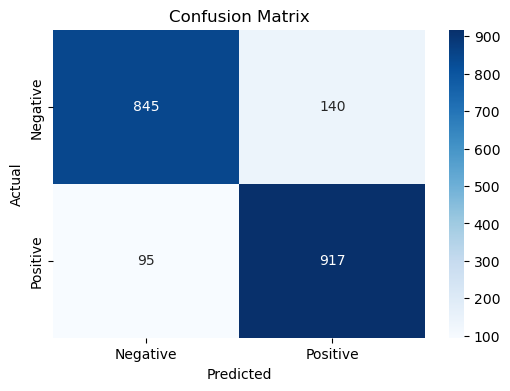

In [41]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## RNN

RNN stands for Recurrent Neural Network. It is a type of neural network which contains memory and best suited for sequential data. 

#### ecoding target , applying svd on train_tfidf and split train test data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD

In [48]:

train_tfidf = tfidf_vect.fit_transform(df['cleaned_review'].values.tolist())
X = train_tfidf  # Your TF-IDF data
y = df['sentiment']  # Your target labels (sentiments)


n_components = 100  # Adjust this value based on your needs
svd = TruncatedSVD(n_components=n_components)
X_reduced = svd.fit_transform(train_tfidf)

In [49]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [73]:

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.1, random_state=1)

In [51]:
X_train 

array([[ 0.05526558, -0.03568404,  0.00213017, ..., -0.0160492 ,
         0.0123489 ,  0.00707797],
       [ 0.0841719 ,  0.03615108,  0.03127256, ...,  0.01451063,
         0.00339905, -0.00454318],
       [ 0.06336159, -0.04097895,  0.0352971 , ..., -0.01904276,
        -0.0130914 , -0.00059025],
       ...,
       [ 0.05529769, -0.00280577,  0.02266443, ...,  0.00306319,
        -0.02973923, -0.00303137],
       [ 0.04674627,  0.00572588, -0.01118108, ...,  0.02144834,
         0.01830394,  0.01553353],
       [ 0.09646322, -0.01928574, -0.06229696, ...,  0.01694429,
         0.01522944,  0.015432  ]])

 RNN (Recurrent Neural Network) to process sequential data.
 
The "flatten" layer is used to convert the RNN's multi-dimensional output into a one-dimensional format for further processing.
To enhance training speed, strategies like sequence length reduction, GPU acceleration, and optimized batch sizes can be applied.
Model architecture, optimizer selection, and vocabulary size can also impact training speed. These adjustments aim to efficiently train the RNN for better performance.

<img src="rnn.png" alt="rnn">

In [77]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))

# Flatten the embedding output
model.add(Flatten())

# Add a Dense layer with more units for better capacity (adjust as needed)
model.add(Dense(64, activation='relu'))

# Add the output layer for binary classification with a sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [78]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, callbacks=[early_stopping])

Epoch 1/5
71/71 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5405
Epoch 2/5
71/71 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4903 - val_loss: 0.6931 - val_accuracy: 0.5405
Epoch 3/5
71/71 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6933 - val_accuracy: 0.4595
Epoch 4/5
71/71 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.4952 - val_loss: 0.6933 - val_accuracy: 0.4595


In [79]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

32/32 [==============================] - 0s 996us/step - loss: 0.6931 - accuracy: 0.5405
Accuracy: 0.54
